In [3]:
#Warming Up Exercise:
#TASK 1 
time_data = [
    (3.5, 2.0, 7.0), (5.0, 1.5, 6.5), (2.5, 3.0, 8.0),
    (4.0, 2.0, 6.0), (1.5, 4.5, 9.0), (3.0, 2.5, 7.5),
    (5.5, 1.0, 6.0), (2.0, 3.5, 8.5), (4.5, 2.0, 7.0),
    (3.0, 3.0, 7.5), (6.0, 1.5, 6.0), (2.5, 4.0, 8.0),
    (4.0, 2.5, 7.0), (5.0, 2.0, 6.5), (3.5, 2.5, 7.0)
]

low_study = []
moderate_study = []
high_study = []

for study, _, _ in time_data:
    if study < 3:
        low_study.append(study)
    elif 3 <= study <= 5:
        moderate_study.append(study)
    else:
        high_study.append(study)

print("Low Study:", low_study)
print("Moderate Study:", moderate_study)
print("High Study:", high_study)

#TAKS 2 
print("days with Low Study time:", len(low_study))
print("days with Moderate Study time:", len(moderate_study))
print("days with High Study time:", len(high_study))

#TASK 3 (convert study hours to minutes)
study_minutes = [study * 60 for study, _, _ in time_data]
print("Study Minutes:", study_minutes)

#Task 4
study_hours = []
entertainment_hours = []
sleep_hours = []

for study, entertainment, sleep in time_data:
    study_hours.append(study)
    entertainment_hours.append(entertainment)
    sleep_hours.append(sleep)

avg_study = sum(study_hours) / len(study_hours)
avg_entertainment = sum(entertainment_hours) / len(entertainment_hours)
avg_sleep = sum(sleep_hours) / len(sleep_hours)

print(f"Average Study Hours: {avg_study:.2f}")
print(f"Average Entertainment Hours: {avg_entertainment:.2f}")
print(f"Average Sleep Hours: {avg_sleep:.2f}")

Low Study: [2.5, 1.5, 2.0, 2.5]
Moderate Study: [3.5, 5.0, 4.0, 3.0, 4.5, 3.0, 4.0, 5.0, 3.5]
High Study: [5.5, 6.0]
days with Low Study time: 4
days with Moderate Study time: 9
days with High Study time: 2
Study Minutes: [210.0, 300.0, 150.0, 240.0, 90.0, 180.0, 330.0, 120.0, 270.0, 180.0, 360.0, 150.0, 240.0, 300.0, 210.0]
Average Study Hours: 3.70
Average Entertainment Hours: 2.50
Average Sleep Hours: 7.17


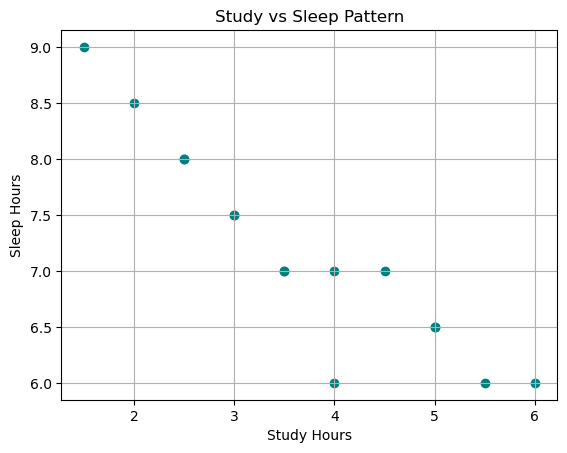

In [4]:
#TASK 5
import matplotlib.pyplot as plt

study = [s for s, _, _ in time_data]
sleep = [sl for _, _, sl in time_data]

plt.scatter(study, sleep, color='teal')
plt.xlabel("Study Hours")
plt.ylabel("Sleep Hours")
plt.title("Study vs Sleep Pattern")
plt.grid(True)
plt.show()

In [ ]:
#8.1.1 Exercise - Recursion:
#TASK 1
def sum_nested_list(nested_list):
    total = 0
    for item in nested_list:
        if isinstance(item, list):
            total += sum_nested_list(item) 
        else:
            total += item 
    return total


nested_list = [1, [2, [3, 4], 5], 6, [7, 8]]
result = sum_nested_list(nested_list)
print("Total sum:", result)



In [ ]:
#TASK 2
def generate_permutations(s):
    def backtrack(path, counter, result):
        if len(path) == len(s):
            result.append("".join(path))
            return
        for char in counter:
            if counter[char] > 0:
                path.append(char)
                counter[char] -= 1
                backtrack(path, counter, result)
                path.pop()
                counter[char] += 1

    from collections import Counter
    result = []
    counter = Counter(s)
    backtrack([], counter, result)
    return result

print(generate_permutations("abc"))

print(generate_permutations("aab"))


In [ ]:
#TASKK 3
def calculate_directory_size(directory):
    total_size = 0
    for name, content in directory.items():
        if isinstance(content, dict):
            total_size += calculate_directory_size(content)
        else:
            total_size += content
    return total_size

directory_structure = {
    "file1.txt": 200,
    "file2.txt": 300,
    "subdir1": {
        "file3.txt": 400,
        "file4.txt": 100
    },
    "subdir2": {
        "subsubdir1": {
            "file5.txt": 250
        },
        "file6.txt": 150
    }
}

print("Total directory size:", calculate_directory_size(directory_structure), "KB")

In [1]:
#DYNAMIC PROGRAMMING 
#TASK 1 
def min_coins(coins, amount):
    """
    Finds the minimum number of coins needed to make up a given amount using dynamic programming.
    """
    dp = [float('inf')] * (amount + 1)
    dp[0] = 0
    
    for coin in coins:
        for i in range(coin, amount + 1):
            dp[i] = min(dp[i], dp[i - coin] + 1)
    
    return dp[amount] if dp[amount] != float('inf') else -1

# Test cases
print(min_coins([1, 2, 5], 11))  
print(min_coins([2], 3))         

3
-1


In [ ]:
#TASK 2 
def longest_common_subsequence(s1, s2):
    """
    Finds the length of the longest common subsequence (LCS) between two strings using DP.
    """
    m, n = len(s1), len(s2)
    dp = [[0] * (n + 1) for _ in range(m + 1)]
    
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if s1[i - 1] == s2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1] + 1
            else:
                dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])
    
    return dp[m][n]

# Test cases
print(longest_common_subsequence("abcde", "ace"))   
print(longest_common_subsequence("abc", "abc"))     
print(longest_common_subsequence("abc", "def"))     

In [ ]:
#TASK 3 
def knapsack(weights, values, capacity):
    """
    Solves the 0/1 Knapsack Problem using dynamic programming.
    Returns the maximum value achievable within the given capacity.
    """
    n = len(weights)
    dp = [[0] * (capacity + 1) for _ in range(n + 1)]
    
    for i in range(1, n + 1):
        for w in range(1, capacity + 1):
            if weights[i - 1] <= w:
                dp[i][w] = max(dp[i - 1][w],
                               values[i - 1] + dp[i - 1][w - weights[i - 1]])
            else:
                dp[i][w] = dp[i - 1][w]
    
    return dp[n][capacity]

# Test case
weights = [1, 3, 4, 5]
values = [1, 4, 5, 7]
capacity = 7

print(knapsack(weights, values, capacity))  